# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [20]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [21]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [22]:
#  1. Get the total rides for each city type(
totalrides_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
 

In [23]:
# 2. Get the total drivers for each city type
totaldrivers_count = pyber_data_df.groupby(["type"]).sum()["driver_count"]
totaldrivers_count


type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [24]:
#  3. Get the total amount of fares for each city type
totalfares_count = pyber_data_df.groupby(["type"]).sum()["fare"]


In [25]:
#  4. Get the average fare per ride for each city type. 
avgfare_cities = pyber_data_df.groupby(["type"]).mean()["fare"]


In [26]:
# 5. Get the average fare per driver for each city type. 
avgfare_perdriver_cities = totalfares_count / totaldrivers_count



In [27]:
#  6. Create a PyBer summary DataFrame. 
#data = [[totalrides_count], [totaldrivers_count], [totalfares_count], [avgfare_cities], [avgfare_perdriver_cities]]

df1 = pd.DataFrame(totalrides_count)
 
df2 = pd.DataFrame(totaldrivers_count)

df3 = pd.DataFrame(totalfares_count)

df4 = pd.DataFrame(avgfare_cities)

df5 = pd.DataFrame(avgfare_perdriver_cities)

pyber_summary1 = pd.merge(df1, df2 ,on = 'type')
pyber_summary2 = pd.merge(pyber_summary1, df3, on = 'type')
pyber_summary3 = pd.merge(pyber_summary2, df4, on = 'type')
pyber_summary_df = pd.merge(pyber_summary3, df5, on = 'type')
pyber_summary_df = pyber_summary_df.rename(columns = {"ride_id":"Total Rides", "driver_count":"Total Drivers", "fare_x":"Total Fares", "fare_y":"Average Fare per Ride", 0:"Average Fare per Driver"})



In [28]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [29]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)

pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df



,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [30]:
# 1. Read the merged DataFrame
pyber_data_df


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [31]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
totalfares_date = pyber_data_df.groupby(["date" ,"type"]).sum()["fare"]

totalfares_date_df = pd.DataFrame(totalfares_date)


In [32]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
totalfares_date_df = totalfares_date_df.reset_index()



In [33]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
totalfares_date_df = totalfares_date_df.pivot(index = "date", columns ="type" , values = "fare")


In [34]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
#totalfares_new_df = totalfares_date_df.loc[(totalfares_date_df["date"] >= 2019-0o1-0o1 0o1:0o1:0o1)
#totalfares_date_df.loc[(totalfares_date_df["date"] > '2019-01-01 00:00:00') & (totalfares_date_df["date"] < '2019-04-29 00:00:00')]
totalfares_new_df = totalfares_date_df.loc['2019-01-01':'2019-04-29']


In [35]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
totalfares_new_df.index = pd.to_datetime(totalfares_new_df.index)

In [36]:
# 7. Check that the datatype for the index is datetime using df.info()
totalfares_new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [37]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
faresum_bydate_df = pd.DataFrame(totalfares_new_df.resample("W").sum())




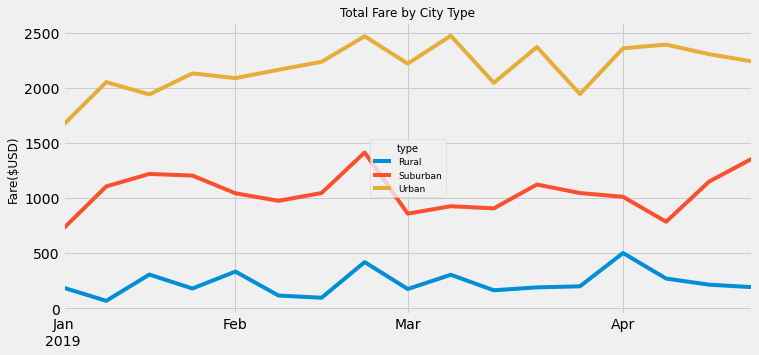

In [38]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.

style.use('fivethirtyeight')
faresum_bydate_df.plot(figsize = (11,5))
plt.title("Total Fare by City Type", fontsize = 12)
plt.ylabel("Fare($USD)", fontsize = 12)
plt.xlabel("")
# Create a legend
lgnd = plt.legend(fontsize="9", title= "type" )
lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(10)
plt.savefig("analysis/PyBer_fare_summary.png")
